# Preparation

Preparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `SC_HW1_bank_data.csv` sebelum tahap pemodelan :
1. Import Library
2. Input Dataset
3. Preprocessing
4. Train-Test Split

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Input Dataset

In [ ]:
#Membaca data dan memasukkannya ke dalam bentuk Pandas Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/SC_HW1_bank_data.csv')

In [ ]:
df

,RowNumber,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#Jalankan code untuk mengecek nama kolom yang tersedia
df.columns

Index(['RowNumber', 'CustomerId', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [ ]:
#Hilangkan kolom yang dirasa tidak relevan dengan model (contoh: ID). None dapat diisi dengan nama-nama kolom yang akan digunakan.
#Contoh df = df[['X1','X2', 'Y']].copy()

#START CODE
df = df[['Geography','Age','Tenure','Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','EstimatedSalary','Exited']].copy()

In [ ]:
df

,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,42,2,0.00,1,1,1,101348.88,1
1,Spain,41,1,83807.86,1,0,1,112542.58,0
2,France,42,8,159660.80,3,1,0,113931.57,1
3,France,39,1,0.00,2,0,0,93826.63,0
4,Spain,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,France,39,5,0.00,2,1,0,96270.64,0
9996,France,35,10,57369.61,1,1,1,101699.77,0
9997,France,36,7,0.00,1,0,1,42085.58,1
9998,Germany,42,3,75075.31,2,1,0,92888.52,1


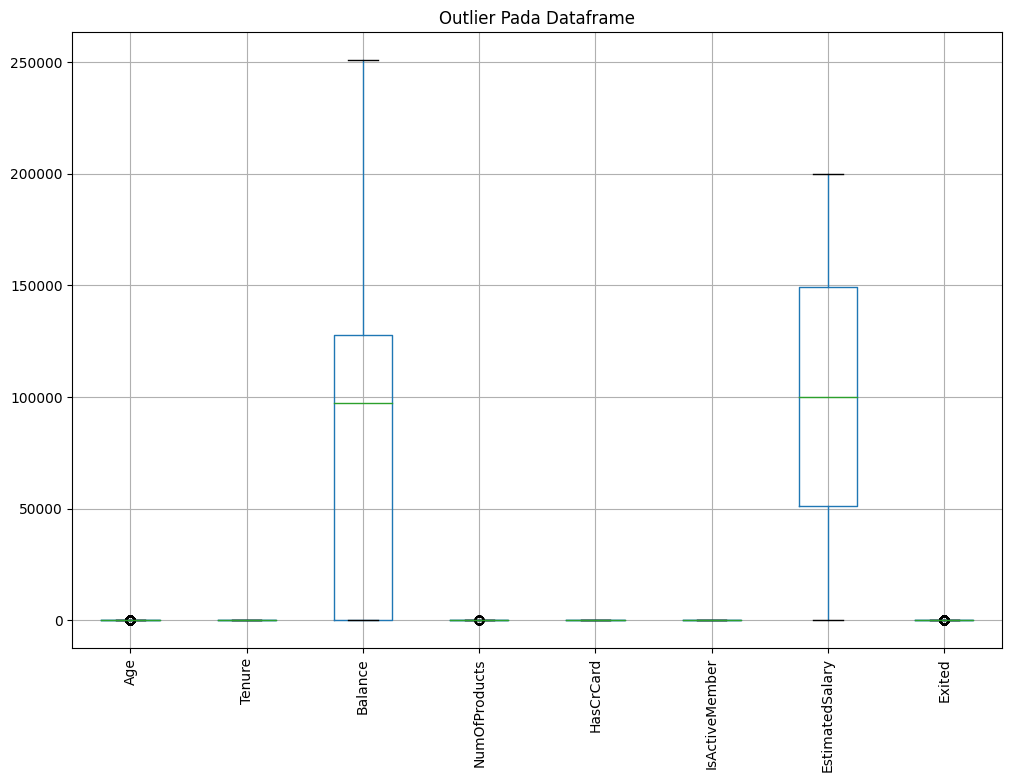

In [ ]:
# Mendeteksi outlier
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Outlier Pada Dataframe')
plt.xticks(rotation=90)
plt.show()

## Preprocessing

In [ ]:
#Lakukan One-Hot Encoder untuk data categorical, dengan fungsi pandas get_dummies

#START CODE
df = pd.get_dummies(df, columns=['Geography'])

In [ ]:
#Pisahkan mana X (feature) dengan Y,
#Y adalah kolom "Exited"

#START CODE
X = df.drop('Exited', axis=1)
Y = df['Exited']


In [ ]:
#Lakukan Scaler dan/atau Noermalisasi jika diperlukan
from sklearn.preprocessing import MinMaxScaler

#START CODE
scaler = MinMaxScaler()
X_transform = scaler.fit_transform(X)

In [ ]:
print("X (Fitur setelah scaling):")
print(X_transform)

print("\nY (Target):")
print(Y)

X (Fitur setelah scaling):
[[0.32432432 0.2        0.         ... 1.         0.         0.        ]
 [0.31081081 0.1        0.33403148 ... 0.         0.         1.        ]
 [0.32432432 0.8        0.63635718 ... 1.         0.         0.        ]
 ...
 [0.24324324 0.7        0.         ... 1.         0.         0.        ]
 [0.32432432 0.3        0.29922631 ... 0.         1.         0.        ]
 [0.13513514 0.4        0.51870777 ... 1.         0.         0.        ]]

Y (Target):
0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [ ]:
#Ini digunakan jika dilakukan scaler/Normalisas. Jika tidak, code ini bisa dilewat dan diganti dengan code yang ada di dalam komen
X_transform = pd.DataFrame(X_transform, columns = X.columns)
#X_transform = X.copy()

## Train-Test Split

In [ ]:
#Split menjadi train dan test dengan test_size 25%
#Tidak perlu mengubah code ini

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_transform,Y,test_size = 0.25,random_state = 123)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, counts of label '1': 1520
Before OverSampling, counts of label '0': 5980 

After OverSampling, the shape of train_X: (11960, 10)
After OverSampling, the shape of train_y: (11960,) 

After OverSampling, counts of label '1': 5980
After OverSampling, counts of label '0': 5980


# Modeling

## Model1

### Soal :
Jelaskan secara Singkat Model pertama yang digunakan!

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

# Tentukan hyperparameter yang ingin dioptimasi
params = {
    "tol": [0.1,0.01,0.001],
    'C': [0.5,1.0,1.5,2.0]
}

# Lakukan parameter tuning menggunakan GridSearchCV
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    estimator=model1,
    param_grid=params,
    scoring='accuracy',
    n_jobs=10,  # Jumlah core CPU yang digunakan
    cv=10  # 10-fold cross-validation (anda bisa mengganti sesuai kebutuhan)
)

grid.fit(X_train, y_train)
best_params = grid.best_params_
print("Hyperparameter terbaik:", best_params)


Hyperparameter terbaik: {'C': 0.5, 'tol': 0.1}


In [ ]:
#lakukan evaluasi dengan beberapa maetric di bawah ini
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1983
           1       0.66      0.17      0.27       517

    accuracy                           0.81      2500
   macro avg       0.74      0.57      0.58      2500
weighted avg       0.79      0.81      0.76      2500


[[1938   45]
 [ 428   89]]

0.8108


Pada model logistic regression hasil akurasi yang diperoleh adalah 0.81 setelah dilakukkan tuning menggunakan GridSearchCV. Hyperparameter terbaik yang diperoleh adalah C 0.5 dan tol 0.1.

## Model2
### Soal :
Jelaskan secara Singkat Model ke-2 yang digunakan!

In [ ]:
#START CODE
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Membuat model XGBoost
model2 = xgb.XGBClassifier()

# Menentukan parameter grid yang akan diteliti
params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
}

# Membuat objek GridSearchCV
grid2 = GridSearchCV(
    estimator=model2,
    param_grid=params,
    scoring='accuracy',
    n_jobs=10,
    cv=10
)

grid2.fit(X_train,y_train)
# Menampilkan parameter terbaik
best_params = grid2.best_params_
print("Parameter terbaik:", best_params)

Parameter terbaik: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
#lakukan evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = grid2.predict(X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1983
           1       0.77      0.51      0.61       517

    accuracy                           0.87      2500
   macro avg       0.83      0.73      0.77      2500
weighted avg       0.86      0.87      0.86      2500


[[1906   77]
 [ 255  262]]

0.8672


Model yang kedua adalah XGBoost yang merupakan jenis algoritma ensemble yang berfokus pada pohon keputusan dan dirancang untuk meningkatkan kinerja model. Hasil dari model XGBoost adalah tingkat pembelajaran terbaik dengan nilai 0.1, kedalaman maksimum pohon 4, jumlah estimator 100 dan proporsi sampel yang digunakan dalam setiap iterasi adalah 0.8. Nilai akurasi yang diperoleh adalah 0.87.

## Model3
### Soal :
Jelaskan secara Singkat Model ke-3 yang digunakan!

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Buat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model Random Forest
rf_model.fit(X_train, y_train)

# Prediksi dengan model Random Forest
rf_pred = rf_model.predict(X_test)

# Evaluasi model Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Accuracy of Random Forest: {rf_accuracy:.2f}')
print(classification_report(y_test,rf_pred))
print("")
print(confusion_matrix(y_test,rf_pred))
print("")
print(accuracy_score(y_test, rf_pred))


Accuracy of Random Forest: 0.86
              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1983
           1       0.74      0.48      0.59       517

    accuracy                           0.86      2500
   macro avg       0.81      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500


[[1896   87]
 [ 267  250]]

0.8584


Pada model ketiga adalah model random forest classifier, pada model ini nilai akurasi yang diperoleh adalah 0.86 dengan nilai estimator 100 dan random state 42.

## Model4
### Soal :
Jelaskan secara Singkat Model ke-3 yang digunakan!

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()

# Melatih model SVM pada data pelatihan
svm_model.fit(X_train, y_train.ravel())

# Melakukan prediksi pada data pengujian
y_pred = svm_model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model SVM:", accuracy)

Akurasi model SVM: 0.8404


In [ ]:
#lakukan evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = svm_model.predict(X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1983
           1       0.86      0.27      0.42       517

    accuracy                           0.84      2500
   macro avg       0.85      0.63      0.66      2500
weighted avg       0.84      0.84      0.81      2500


[[1959   24]
 [ 375  142]]

0.8404


Model terakhir adalah SVM merupakan model klasifikasi yang cocok untuk kasus klasifikasi dan regresi non linear. hasil nilai akurasi pada model SVM adalah 0.84

## Tarik Kesimpulan Model Mana yang terbaik beserta alasannya

Berdasarkan hasil dari model diatas dapat disimpulkan bahwa model yang memiliki nilai akurasi tertinggi adalah 0.87 yang diperoleh dari model XGBoost atau jenis algoritma ensemble.
berikut kesimpulan masing-masing hasil model diatas :


*   Pada model logistic regression hasil akurasi yang diperoleh adalah 0.81 setelah dilakukkan tuning menggunakan GridSearchCV. Hyperparameter terbaik yang diperoleh adalah C 0.5 dan tol 0.1.
*   Model yang kedua adalah XGBoost yang merupakan jenis algoritma ensemble yang berfokus pada pohon keputusan dan dirancang untuk meningkatkan kinerja model. Hasil dari model XGBoost adalah tingkat pembelajaran terbaik dengan nilai 0.1, kedalaman maksimum pohon 4, jumlah estimator 100 dan proporsi sampel yang digunakan dalam setiap iterasi adalah 0.8. Nilai akurasi yang diperoleh adalah 0.87.
*   Pada model ketiga adalah model random forest classifier, pada model ini nilai akurasi yang diperoleh adalah 0.86 dengan nilai estimator 100 dan random state 42.
*   Model terakhir adalah SVM merupakan model klasifikasi yang cocok untuk kasus klasifikasi dan regresi non linear. hasil nilai akurasi pada model SVM adalah 0.84.

